# **Feature Extraction and Price Prediction for Mobile Phones**

**Problem Statement**

- I worked for a prominent organization that specializes in selling mobile phones. The organization is keen to enhance its pricing strategy by gaining a deeper understanding of the key features that influence the prices of mobile phones in today's highly competitive market. my objective is to build a predictive model that can accurately estimate the price of a mobile phone based on its features. To achieve this, you'll perform a feature extraction analysis to identify the most influential features.

**Project Description:**

- In this project, I worked with a dataset that contains detailed information about various mobile phones, including their model, color, memory, RAM, battery capacity, rear camera specifications, front camera specifications, presence of AI lens, mobile height, processor, and, most importantly, the price.
- My goal is to develop a predictive model for mobile phone prices.

**Data Wrangling**

- It convert and format raw data to usable format down to data science pipeline

# **A. Data Exploration:**

In [61]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings


**Uploading dataset file**

In [62]:
ds = pd.read_csv('/content/Processed_Flipdata - Processed_Flipdata.csv')

**Check dataset**

In [63]:
ds

,Unnamed: 0,Model,Colour,Memory,RAM,Battery_,Rear Camera,Front Camera,AI Lens,Mobile Height,Processor_,Prize
0,0,Infinix SMART 7,Night Black,64,4,6000,13MP,5MP,1,16.76,Unisoc Spreadtrum SC9863A1,"7,299"
1,1,Infinix SMART 7,Azure Blue,64,4,6000,13MP,5MP,1,16.76,Unisoc Spreadtrum SC9863A1,"7,299"
2,2,MOTOROLA G32,Mineral Gray,128,8,5000,50MP,16MP,0,16.64,Qualcomm Snapdragon 680,"11,999"
3,3,POCO C50,Royal Blue,32,2,5000,8MP,5MP,0,16.56,Mediatek Helio A22,"5,649"
4,4,Infinix HOT 30i,Marigold,128,8,5000,50MP,5MP,1,16.76,G37,"8,999"
...,...,...,...,...,...,...,...,...,...,...,...,...
536,637,SAMSUNG Galaxy S23 5G,Cream,256,8,3900,50MP,12MP,0,15.49,Qualcomm Snapdragon 8 Gen 2,"79,999"
537,638,LAVA Z21,Cyan,32,2,3100,5MP,2MP,0,12.70,Octa Core,"5,998"
538,639,Tecno Spark 8T,Turquoise Cyan,64,4,5000,50MP,8MP,0,16.76,MediaTek Helio G35,"9,990"
539,641,SAMSUNG Galaxy A54 5G,Awesome Lime,128,8,5000,50MP,32MP,0,16.26,"Exynos 1380, Octa Core","38,999"


**Checking Shape of dataset**

In [64]:
ds.shape[0]

541

In [65]:
ds.shape[1]

12

In [66]:
ds.head()

,Unnamed: 0,Model,Colour,Memory,RAM,Battery_,Rear Camera,Front Camera,AI Lens,Mobile Height,Processor_,Prize
0,0,Infinix SMART 7,Night Black,64,4,6000,13MP,5MP,1,16.76,Unisoc Spreadtrum SC9863A1,"7,299"
1,1,Infinix SMART 7,Azure Blue,64,4,6000,13MP,5MP,1,16.76,Unisoc Spreadtrum SC9863A1,"7,299"
2,2,MOTOROLA G32,Mineral Gray,128,8,5000,50MP,16MP,0,16.64,Qualcomm Snapdragon 680,"11,999"
3,3,POCO C50,Royal Blue,32,2,5000,8MP,5MP,0,16.56,Mediatek Helio A22,"5,649"
4,4,Infinix HOT 30i,Marigold,128,8,5000,50MP,5MP,1,16.76,G37,"8,999"


**Column Attributes**

In [67]:
ds.columns

Index(['Unnamed: 0', 'Model', 'Colour', 'Memory', 'RAM', 'Battery_',
       'Rear Camera', 'Front Camera', 'AI Lens', 'Mobile Height', 'Processor_',
       'Prize'],
      dtype='object')

In [68]:
ds.rename(columns={'Prize': 'Price'}, inplace=True)

In [69]:
ds.columns

Index(['Unnamed: 0', 'Model', 'Colour', 'Memory', 'RAM', 'Battery_',
       'Rear Camera', 'Front Camera', 'AI Lens', 'Mobile Height', 'Processor_',
       'Price'],
      dtype='object')

In [70]:
ds['Price'] = ds['Price'].str.replace(',', '').astype(float)

In [71]:
ds['Price'].dtype

dtype('float64')

In [72]:
ds.head().T

,0,1,2,3,4
Unnamed: 0,0,1,2,3,4
Model,Infinix SMART 7,Infinix SMART 7,MOTOROLA G32,POCO C50,Infinix HOT 30i
Colour,Night Black,Azure Blue,Mineral Gray,Royal Blue,Marigold
Memory,64,64,128,32,128
RAM,4,4,8,2,8
Battery_,6000,6000,5000,5000,5000
Rear Camera,13MP,13MP,50MP,8MP,50MP
Front Camera,5MP,5MP,16MP,5MP,5MP
AI Lens,1,1,0,0,1
Mobile Height,16.76,16.76,16.64,16.56,16.76


In [73]:
ds.dtypes

Unnamed: 0         int64
Model             object
Colour            object
Memory             int64
RAM                int64
Battery_           int64
Rear Camera       object
Front Camera      object
AI Lens            int64
Mobile Height    float64
Processor_        object
Price            float64
dtype: object

Checking info of dataset

In [74]:
ds.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 541 entries, 0 to 540
Data columns (total 12 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Unnamed: 0     541 non-null    int64  
 1   Model          541 non-null    object 
 2   Colour         541 non-null    object 
 3   Memory         541 non-null    int64  
 4   RAM            541 non-null    int64  
 5   Battery_       541 non-null    int64  
 6   Rear Camera    541 non-null    object 
 7   Front Camera   541 non-null    object 
 8   AI Lens        541 non-null    int64  
 9   Mobile Height  541 non-null    float64
 10  Processor_     541 non-null    object 
 11  Price          541 non-null    float64
dtypes: float64(2), int64(5), object(5)
memory usage: 50.8+ KB


In [75]:
ds.describe()

,Unnamed: 0,Memory,RAM,Battery_,AI Lens,Mobile Height,Price
count,541.000000,541.000000,541.000000,541.000000,541.000000,541.000000,541.000000
mean,289.711645,110.550832,5.397412,4871.587800,0.062847,16.431201,16228.375231
std,182.359185,60.600694,1.984923,780.148862,0.242911,2.523553,10793.588322
min,0.000000,16.000000,2.000000,800.000000,0.000000,4.500000,920.000000
25%,135.000000,64.000000,4.000000,5000.000000,0.000000,16.510000,9290.000000
50%,273.000000,128.000000,6.000000,5000.000000,0.000000,16.710000,13499.000000
75%,434.000000,128.000000,8.000000,5000.000000,0.000000,16.940000,19280.000000
max,642.000000,256.000000,8.000000,7000.000000,1.000000,41.940000,80999.000000


In [76]:
cat_column=ds.select_dtypes(include='object')

In [77]:
num_column=ds.select_dtypes(exclude='object')

In [78]:
cat_column.columns

Index(['Model', 'Colour', 'Rear Camera', 'Front Camera', 'Processor_'], dtype='object')

In [79]:
num_column.columns

Index(['Unnamed: 0', 'Memory', 'RAM', 'Battery_', 'AI Lens', 'Mobile Height',
       'Price'],
      dtype='object')

In [80]:
ds['Price'].min()

920.0

In [81]:
ds['Price'].max()

80999.0

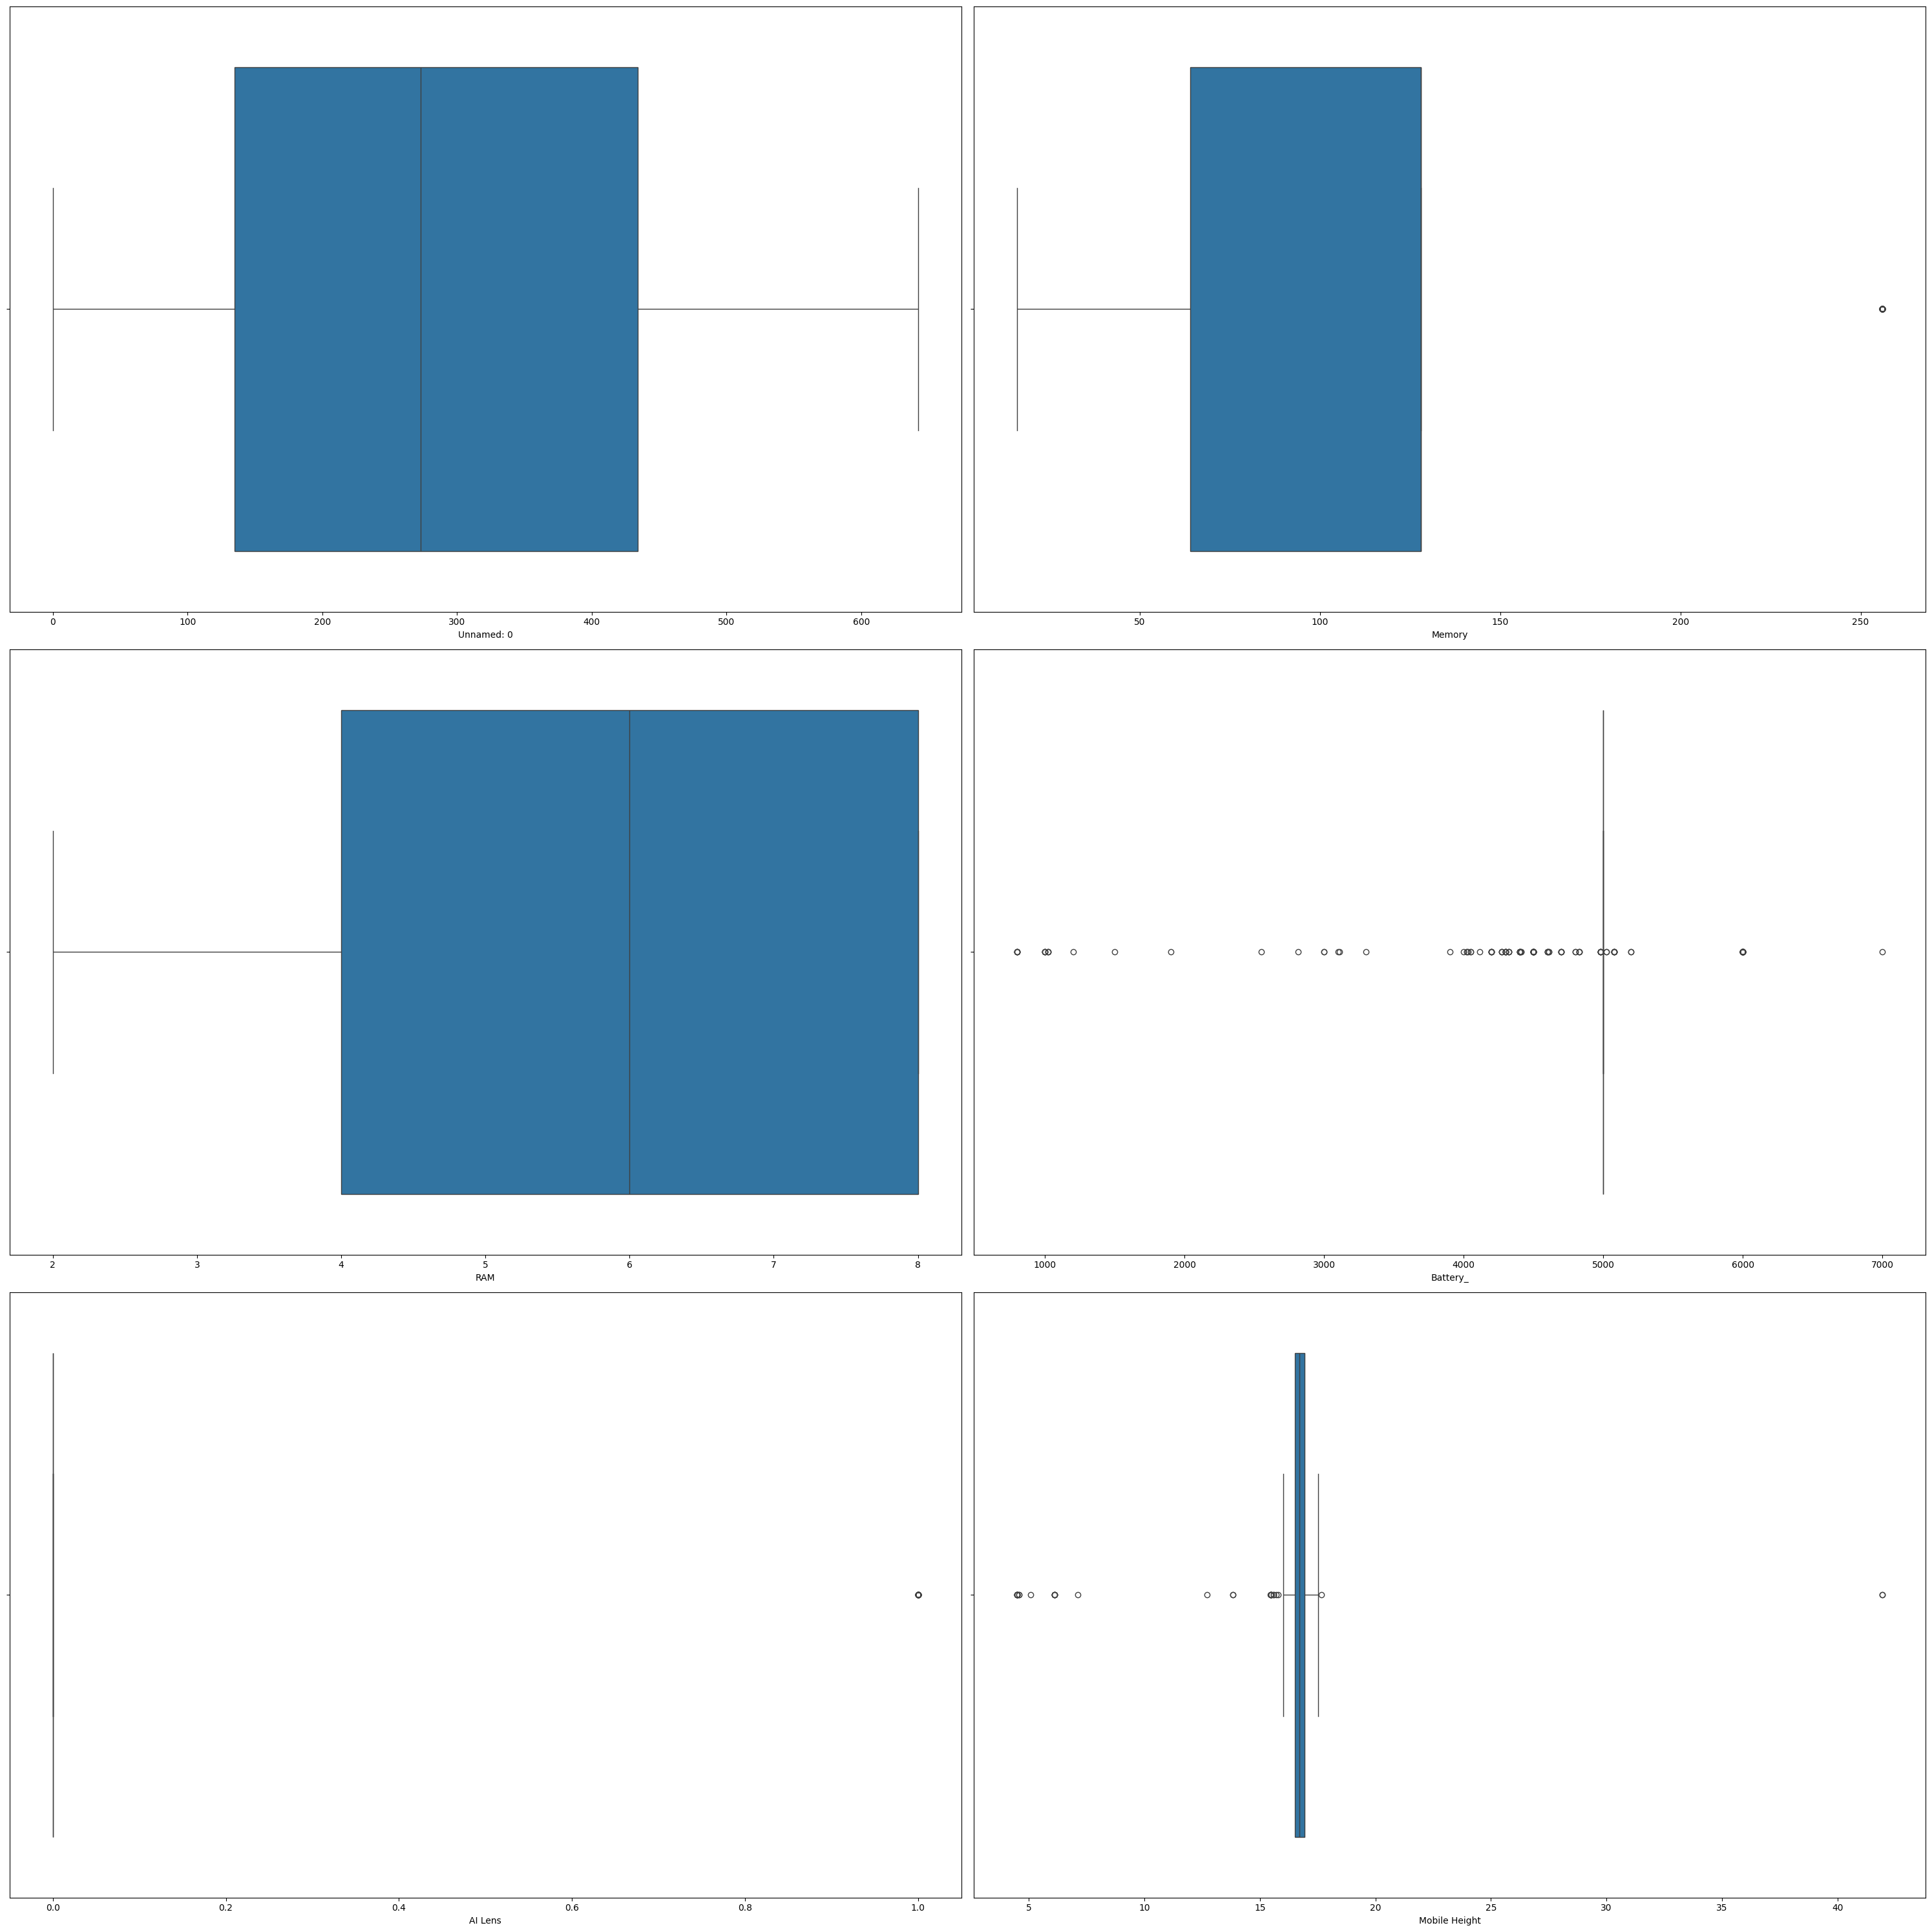

In [82]:
rows = 3
columns = 2

fig, axes = plt.subplots(rows,columns, figsize=(30,30))

x, y = 0, 0

for i, column in enumerate(num_column):
    sns.boxplot(x=ds[column], ax=axes[x, y])

    if y < columns-1:
        y += 1
    else: # Simplified condition - reset y when a row is filled
        x += 1
        y = 0

    # Check if we've filled all subplots
    if x >= rows:
        break

plt.tight_layout() # Adjust layout to prevent overlapping
plt.show()

**B. Data Cleaning**

In [83]:
ds.isnull().sum()

Unnamed: 0       0
Model            0
Colour           0
Memory           0
RAM              0
Battery_         0
Rear Camera      0
Front Camera     0
AI Lens          0
Mobile Height    0
Processor_       0
Price            0
dtype: int64

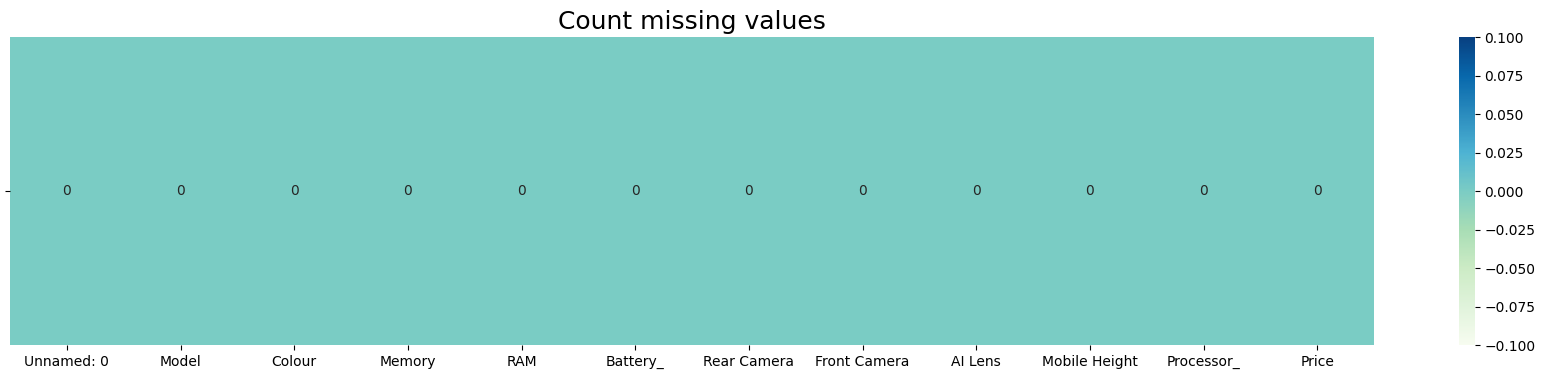

In [84]:
plt.figure(figsize=(22,4))
sns.heatmap((ds.isna().sum()).to_frame(name='').T,cmap='GnBu', annot=True,
             fmt='0.0f').set_title('Count missing values', fontsize=18)
plt.show()

In [85]:
ds.duplicated().sum()

0

In [86]:
missing_values = ds.isnull().sum()
print(missing_values)

Unnamed: 0       0
Model            0
Colour           0
Memory           0
RAM              0
Battery_         0
Rear Camera      0
Front Camera     0
AI Lens          0
Mobile Height    0
Processor_       0
Price            0
dtype: int64


In [87]:
num_cols = ds.select_dtypes(include=['int64', 'float64'])

In [88]:
Q1 = num_cols.quantile(0.25)
Q3 = num_cols.quantile(0.75)
IQR = Q3 - Q1
outliers = ((num_cols < (Q1 - 1.5 * IQR)) | (num_cols > (Q3 + 1.5 * IQR)))
num_outliers = outliers.sum()
num_outliers.to_frame().T

,Unnamed: 0,Memory,RAM,Battery_,AI Lens,Mobile Height,Price
0,0,55,0,152,34,33,25


In [97]:
# Save the modified dataset
ds.to_csv("cleaned_data.csv", index=False)

In [98]:
df = ds.copy()

Outliers Removing

In [102]:
def clean_data(df):
    removed_outliers_info = {}  # Dictionary to store information about removed outliers

    def remove_outliers(column):
        Q1 = column.quantile(0.25)
        Q3 = column.quantile(0.75)
        IQR = Q3 - Q1
        return column[(column >= Q1 - 1.5 * IQR) & (column <= Q3 + 1.5 * IQR)]

    # Iterate over each numerical column
    for column in df.select_dtypes(include=['float64', 'int64']).columns:
        # Count rows before outlier removal
        rows_before = df.shape[0]

        # Remove outliers from the column
        cleaned_column = remove_outliers(df[column])

        # Count rows after outlier removal
        rows_after = cleaned_column.shape[0]

        # Calculate number of outliers removed
        outliers_removed = rows_before - rows_after

        # Store information about removed outliers
        removed_outliers_info[column] = outliers_removed

        # Replace the column with cleaned data and fill NaNs with median
        df[column] = cleaned_column
        df[column].fillna(cleaned_column.median(), inplace=True)

    # Drop rows with any remaining NaN values
    df.dropna(inplace=True)

    # Create a DataFrame of cleaned data
    cleaned_data = df.copy()

    # Return cleaned DataFrame and removed outliers information
    return cleaned_data, pd.DataFrame.from_dict(removed_outliers_info, orient='index', columns=['Outliers Removed']).T

# Call the function to clean data
cleaned_data, df_removed_outliers = clean_data(df)

print("\nInformation about removed outliers:")
df_removed_outliers


Information about removed outliers:


,Unnamed: 0,Memory,RAM,Battery_,AI Lens,Mobile Height,Price
Outliers Removed,0,0,0,0,0,0,0


In [103]:
cleaned_data

,Unnamed: 0,Model,Colour,Memory,RAM,Battery_,Rear Camera,Front Camera,AI Lens,Mobile Height,Processor_,Price
0,0,Infinix SMART 7,Night Black,64.0,4,5000.0,13MP,5MP,0.0,16.76,Unisoc Spreadtrum SC9863A1,7299.0
1,1,Infinix SMART 7,Azure Blue,64.0,4,5000.0,13MP,5MP,0.0,16.76,Unisoc Spreadtrum SC9863A1,7299.0
2,2,MOTOROLA G32,Mineral Gray,128.0,8,5000.0,50MP,16MP,0.0,16.64,Qualcomm Snapdragon 680,11999.0
3,3,POCO C50,Royal Blue,32.0,2,5000.0,8MP,5MP,0.0,16.56,Mediatek Helio A22,5649.0
4,4,Infinix HOT 30i,Marigold,128.0,8,5000.0,50MP,5MP,0.0,16.76,G37,8999.0
...,...,...,...,...,...,...,...,...,...,...,...,...
536,637,SAMSUNG Galaxy S23 5G,Cream,128.0,8,5000.0,50MP,12MP,0.0,16.76,Qualcomm Snapdragon 8 Gen 2,12999.0
537,638,LAVA Z21,Cyan,32.0,2,5000.0,5MP,2MP,0.0,16.76,Octa Core,5998.0
538,639,Tecno Spark 8T,Turquoise Cyan,64.0,4,5000.0,50MP,8MP,0.0,16.76,MediaTek Helio G35,9990.0
539,641,SAMSUNG Galaxy A54 5G,Awesome Lime,128.0,8,5000.0,50MP,32MP,0.0,16.26,"Exynos 1380, Octa Core",12999.0


In [106]:
ds.isnull().sum()

Unnamed: 0       0
Model            0
Colour           0
Memory           0
RAM              0
Battery_         0
Rear Camera      0
Front Camera     0
AI Lens          0
Mobile Height    0
Processor_       0
Price            0
dtype: int64

In [107]:
ds['Price'].isnull().sum()

0

EDA

In [108]:
num_cols.corr()

,Unnamed: 0,Memory,RAM,Battery_,AI Lens,Mobile Height,Price
Unnamed: 0,1.000000,0.120579,0.084103,-0.057136,-0.160373,0.015372,0.333940
Memory,0.120579,1.000000,0.625284,-0.053210,-0.094442,0.063163,0.566660
RAM,0.084103,0.625284,1.000000,-0.104923,-0.082622,0.092951,0.532024
Battery_,-0.057136,-0.053210,-0.104923,1.000000,0.150156,0.695641,-0.034297
AI Lens,-0.160373,-0.094442,-0.082622,0.150156,1.000000,0.052018,-0.153691
Mobile Height,0.015372,0.063163,0.092951,0.695641,0.052018,1.000000,0.176009
Price,0.333940,0.566660,0.532024,-0.034297,-0.153691,0.176009,1.000000


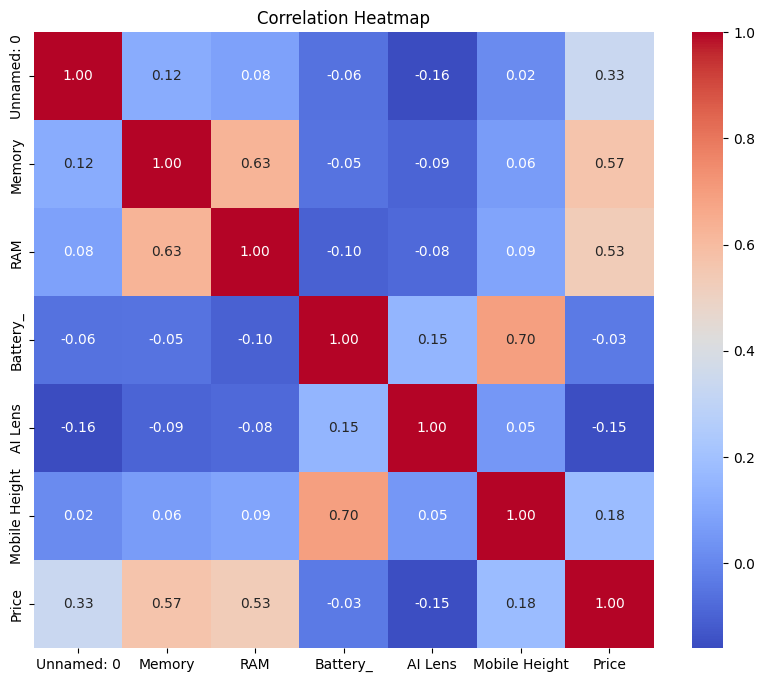

In [110]:
correlation_matrix=num_cols.corr()
correlation_matrix
plt.figure(figsize=(10, 8))
sns.heatmap(num_cols.corr(), annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Heatmap')
plt.show()

In [112]:
import plotly.express as px

In [113]:
fig = px.histogram(ds, x='Mobile Height',
                   title='Distribution of Mobile Heights',
                   labels={'Mobile Height': 'Mobile Height (mm)'},
                   template='plotly_dark')
fig.show()

In [114]:
cleaned_data.head()

,Unnamed: 0,Model,Colour,Memory,RAM,Battery_,Rear Camera,Front Camera,AI Lens,Mobile Height,Processor_,Price
0,0,Infinix SMART 7,Night Black,64.0,4,5000.0,13MP,5MP,0.0,16.76,Unisoc Spreadtrum SC9863A1,7299.0
1,1,Infinix SMART 7,Azure Blue,64.0,4,5000.0,13MP,5MP,0.0,16.76,Unisoc Spreadtrum SC9863A1,7299.0
2,2,MOTOROLA G32,Mineral Gray,128.0,8,5000.0,50MP,16MP,0.0,16.64,Qualcomm Snapdragon 680,11999.0
3,3,POCO C50,Royal Blue,32.0,2,5000.0,8MP,5MP,0.0,16.56,Mediatek Helio A22,5649.0
4,4,Infinix HOT 30i,Marigold,128.0,8,5000.0,50MP,5MP,0.0,16.76,G37,8999.0


In [115]:
cleaned_data.shape

(541, 12)

In [116]:
cleaned_data.isnull().sum()

Unnamed: 0       0
Model            0
Colour           0
Memory           0
RAM              0
Battery_         0
Rear Camera      0
Front Camera     0
AI Lens          0
Mobile Height    0
Processor_       0
Price            0
dtype: int64

**Label Encoder:**

In [117]:
c1_col=cleaned_data.select_dtypes(include=['object'])

In [118]:
c1_col

,Model,Colour,Rear Camera,Front Camera,Processor_
0,Infinix SMART 7,Night Black,13MP,5MP,Unisoc Spreadtrum SC9863A1
1,Infinix SMART 7,Azure Blue,13MP,5MP,Unisoc Spreadtrum SC9863A1
2,MOTOROLA G32,Mineral Gray,50MP,16MP,Qualcomm Snapdragon 680
3,POCO C50,Royal Blue,8MP,5MP,Mediatek Helio A22
4,Infinix HOT 30i,Marigold,50MP,5MP,G37
...,...,...,...,...,...
536,SAMSUNG Galaxy S23 5G,Cream,50MP,12MP,Qualcomm Snapdragon 8 Gen 2
537,LAVA Z21,Cyan,5MP,2MP,Octa Core
538,Tecno Spark 8T,Turquoise Cyan,50MP,8MP,MediaTek Helio G35
539,SAMSUNG Galaxy A54 5G,Awesome Lime,50MP,32MP,"Exynos 1380, Octa Core"


In [119]:
from sklearn.preprocessing import LabelEncoder
label_encoder = LabelEncoder()
encoded_columns = {}
for column in c1_col:
    encoded_columns[column] = label_encoder.fit_transform(cleaned_data[column])

# Create a DataFrame of encoded values
encoded_data = pd.DataFrame(encoded_columns)

# Concatenate the encoded DataFrame with the cleaned_data DataFrame
d1 = pd.concat([cleaned_data.drop(columns=c1_col), encoded_data], axis=1)

# Display the combined DataFrame
print("\nCombined DataFrame:")
d1


Combined DataFrame:


,Unnamed: 0,Memory,RAM,Battery_,AI Lens,Mobile Height,Price,Model,Colour,Rear Camera,Front Camera,Processor_
0,0,64.0,4,5000.0,0.0,16.76,7299.0,23,159,3,10,113
1,1,64.0,4,5000.0,0.0,16.76,7299.0,23,20,3,10,113
2,2,128.0,8,5000.0,0.0,16.64,11999.0,37,149,10,4,75
3,3,32.0,2,5000.0,0.0,16.56,5649.0,69,201,13,10,56
4,4,128.0,8,5000.0,0.0,16.76,8999.0,12,130,10,10,14
...,...,...,...,...,...,...,...,...,...,...,...,...
536,637,128.0,8,5000.0,0.0,16.76,12999.0,118,49,10,2,89
537,638,32.0,2,5000.0,0.0,16.76,5998.0,32,52,11,6,68
538,639,64.0,4,5000.0,0.0,16.76,9990.0,123,259,10,12,35
539,641,128.0,8,5000.0,0.0,16.26,12999.0,110,17,10,7,11


In [120]:
label_encoder

LabelEncoder()

In [121]:
X = d1.drop('Price', axis=1)
y = d1['Price']

In [122]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.25,random_state=42)
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(405, 11)
(136, 11)
(405,)
(136,)


In [123]:
from sklearn.preprocessing import StandardScaler
ss = StandardScaler()
X_train = ss.fit_transform(X_train)
X_test = ss.transform(X_test)

In [124]:
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2
from sklearn.impute import SimpleImputer

In [125]:
d1.isnull().sum()

Unnamed: 0       0
Memory           0
RAM              0
Battery_         0
AI Lens          0
Mobile Height    0
Price            0
Model            0
Colour           0
Rear Camera      0
Front Camera     0
Processor_       0
dtype: int64

In [126]:
order_rank_features = SelectKBest(score_func=chi2, k=10)
order_feature = order_rank_features.fit(X, y)

In [128]:
dsscores = pd.DataFrame(order_feature.scores_, columns=["Score"])
dscolumns = pd.DataFrame(X.columns, columns=["Features"])
features_rank = pd.concat([dscolumns, dsscores], axis=1)
features_rank.columns = ['Features', 'Score']
features_rank

,Features,Score
0,Unnamed: 0,2.589075e+04
1,Memory,6.327817e+03
2,RAM,2.752192e+02
3,Battery_,5.133360e-25
4,AI Lens,NaN
5,Mobile Height,3.651563e-01
6,Model,5.398076e+03
7,Colour,6.073417e+03
8,Rear Camera,4.384611e+02
9,Front Camera,6.276357e+02


In [133]:
!pip install scikit-feature

ERROR: Could not find a version that satisfies the requirement scikit-feature (from versions: none)
ERROR: No matching distribution found for scikit-feature


In [146]:
def fisher_score(X, y):
    classes = np.unique(y)
    fisher_scores = []
    for feature in X.T:
        numerator = 0
        denominator = 0
        overall_mean = np.mean(feature)
        for c in classes:
            class_feature = feature[y == c]
            class_mean = np.mean(class_feature)
            class_variance = np.var(class_feature)
            numerator += len(class_feature) * (class_mean - overall_mean) ** 2
            denominator += len(class_feature) * class_variance
        fisher_scores.append(numerator / denominator)
    return np.array(fisher_scores)

fisher_scores = fisher_score(X.values, y.values)
fisher_score_df = pd.DataFrame({'Feature': X.columns, 'Fisher Score': fisher_scores})
fisher_score_df = fisher_score_df.sort_values(by='Fisher Score', ascending=False)
print(fisher_score_df)

          Feature  Fisher Score
1          Memory      4.840703
2             RAM      2.313512
9    Front Camera      1.530664
8     Rear Camera      1.062385
10     Processor_      0.778448
0      Unnamed: 0      0.717319
6           Model      0.537162
5   Mobile Height      0.505030
7          Colour      0.319738
3        Battery_           NaN
4         AI Lens           NaN


<ipython-input-146-dd058d049458>:14: RuntimeWarning:

invalid value encountered in scalar divide



In [149]:
from sklearn.ensemble import ExtraTreesClassifier
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder
from sklearn.impute import SimpleImputer

label_encoders = {}
imputer = SimpleImputer(strategy='most_frequent')
X_imputed = imputer.fit_transform(X)

for i, c1_col in enumerate(X.columns):
    if X[c1_col].dtype == 'object':
        le = LabelEncoder()
        X_imputed[:, i] = le.fit_transform(X_imputed[:, i])
        label_encoders[c1_col] = le

X = pd.DataFrame(X_imputed, columns=X.columns)

model = ExtraTreesClassifier()
model.fit(X, y)

ExtraTreesClassifier()

In [150]:
print(model.feature_importances_)

[0.16526632 0.04891765 0.09504269 0.         0.         0.10693453
 0.16758489 0.07977654 0.0901786  0.08416389 0.16213489]


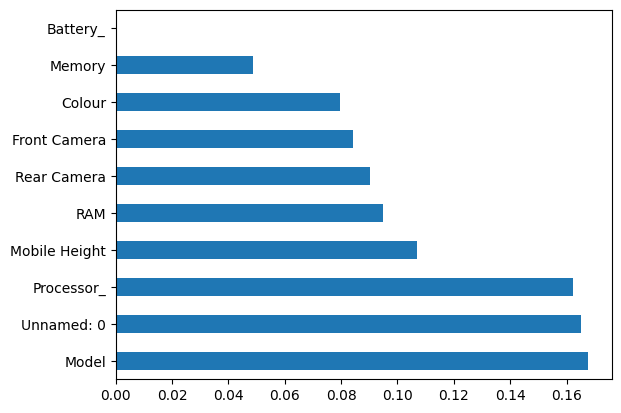

In [151]:
ranked_features=pd.Series(model.feature_importances_,index=X.columns)
ranked_features.nlargest(10).plot(kind='barh')
plt.show()

**Model**

In [156]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.neighbors import KNeighborsRegressor
from sklearn.svm import SVR
from sklearn.ensemble import RandomForestRegressor
from sklearn.impute import SimpleImputer
from sklearn.metrics import mean_squared_error, r2_score

In [161]:
#Standardize the features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)


In [162]:
X = d1.drop('Price',axis=1)
y = d1['Price']

In [158]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=42)

In [163]:
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(432, 11)
(109, 11)
(432,)
(109,)


In [164]:
# Train and evaluate multiple regression models

# Linear Regression
model_linear = LinearRegression()
model_linear.fit(X_train_scaled, y_train)
linear_predictions = model_linear.predict(X_test_scaled)
print("Linear Regression")
print(f"Mean Squared Error: {mean_squared_error(y_test, linear_predictions)}")
print(f"R^2 Score: {r2_score(y_test, linear_predictions)}")

# KNN Regressor
model_knn = KNeighborsRegressor()
model_knn.fit(X_train_scaled, y_train)
knn_predictions = model_knn.predict(X_test_scaled)
print("\nKNN Regressor")
print(f"Mean Squared Error: {mean_squared_error(y_test, knn_predictions)}")
print(f"R^2 Score: {r2_score(y_test, knn_predictions)}")

# Support Vector Regressor
model_svr = SVR()
model_svr.fit(X_train_scaled, y_train)
svr_predictions = model_svr.predict(X_test_scaled)
print("\nSupport Vector Regressor")
print(f"Mean Squared Error: {mean_squared_error(y_test, svr_predictions)}")
print(f"R^2 Score: {r2_score(y_test, svr_predictions)}")

# Random Forest Regressor
model_rf = RandomForestRegressor()
model_rf.fit(X_train_scaled, y_train)
rf_predictions = model_rf.predict(X_test_scaled)
print("\nRandom Forest Regressor")
print(f"Mean Squared Error: {mean_squared_error(y_test, rf_predictions)}")
print(f"R^2 Score: {r2_score(y_test, rf_predictions)}")

Linear Regression
Mean Squared Error: 8149752.368468187
R^2 Score: 0.6660473175227328

KNN Regressor
Mean Squared Error: 6132787.936146788
R^2 Score: 0.7486965382820101

Support Vector Regressor
Mean Squared Error: 24330449.414760634
R^2 Score: 0.0030103393848308624

Random Forest Regressor
Mean Squared Error: 2422405.864637615
R^2 Score: 0.9007369917551927


In [165]:
#Initialize a dictionary to collect metrics
metrics_dict = {}

# Linear Regression
model_linear = LinearRegression()
model_linear.fit(X_train_scaled, y_train)
linear_predictions = model_linear.predict(X_test_scaled)
linear_metrics = {
    'Mean Squared Error': mean_squared_error(y_test, linear_predictions),
    'R^2 Score': r2_score(y_test, linear_predictions)
}
metrics_dict['Linear Regression'] = linear_metrics

# KNN Regressor
model_knn = KNeighborsRegressor()
model_knn.fit(X_train_scaled, y_train)
knn_predictions = model_knn.predict(X_test_scaled)
knn_metrics = {
    'Mean Squared Error': mean_squared_error(y_test, knn_predictions),
    'R^2 Score': r2_score(y_test, knn_predictions)
}
metrics_dict['KNN Regressor'] = knn_metrics

# Support Vector Regressor
model_svr = SVR()
model_svr.fit(X_train_scaled, y_train)
svr_predictions = model_svr.predict(X_test_scaled)
svr_metrics = {
    'Mean Squared Error': mean_squared_error(y_test, svr_predictions),
    'R^2 Score': r2_score(y_test, svr_predictions)
}
metrics_dict['Support Vector Regressor'] = svr_metrics

# Random Forest Regressor
model_rf = RandomForestRegressor()
model_rf.fit(X_train_scaled, y_train)
rf_predictions = model_rf.predict(X_test_scaled)
rf_metrics = {
    'Mean Squared Error': mean_squared_error(y_test, rf_predictions),
    'R^2 Score': r2_score(y_test, rf_predictions)
}
metrics_dict['Random Forest Regressor'] = rf_metrics



In [166]:
# Convert metrics dictionary to DataFrame
metrics_df = pd.DataFrame(metrics_dict)
metrics_df

,Linear Regression,KNN Regressor,Support Vector Regressor,Random Forest Regressor
Mean Squared Error,8.149752e+06,6.132788e+06,2.433045e+07,2.570075e+06
R^2 Score,6.660473e-01,7.486965e-01,3.010339e-03,8.946859e-01


### **CONCLUSION**
**The Random Forest Regressor is the best performing model among the ones evaluated, with the lowest mean squared error and the highest R² score. The Support Vector Regressor performed the worst, with very high prediction error and almost no explanatory power. The KNN Regressor and Linear Regression models have moderate performance, but the Random Forest Regressor clearly outperforms them.**